In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['FB', 'AMZN', 'AAPL', 'GOOGL', 'TSLA']

In [ ]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

# print(news_tables)

In [ ]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

parsed_data[:4]

[['FB',
  'Apr-09-21',
  '11:20PM\xa0\xa0',
  'Top 10 S&P 500 Stocks by Index Weight'],
 ['FB', 'Apr-09-21', '08:04PM\xa0\xa0', 'Facebook: The Classic Toll Bridge'],
 ['FB',
  'Apr-09-21',
  '06:50PM\xa0\xa0',
  'These Are The 5 Best Stocks To Buy And Watch Now'],
 ['FB',
  'Apr-09-21',
  '04:47PM\xa0\xa0',
  'Facebook algorithm shows its users different job ads based on gender, study finds']]

In [ ]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,FB,Apr-09-21,11:20PM,Top 10 S&P 500 Stocks by Index Weight
1,FB,Apr-09-21,08:04PM,Facebook: The Classic Toll Bridge
2,FB,Apr-09-21,06:50PM,These Are The 5 Best Stocks To Buy And Watch Now
3,FB,Apr-09-21,04:47PM,Facebook algorithm shows its users different j...
4,FB,Apr-09-21,11:45AM,Facebook Converts Part Of Menlo Park Headquart...
...,...,...,...,...
495,TSLA,Apr-05-21,04:04PM,"Tesla, Yeti, Pinterest Among Growth Stocks To ..."
496,TSLA,Apr-05-21,04:00PM,"US STOCKS-Strong economic data lifts Dow, S&P ..."
497,TSLA,Apr-05-21,03:02PM,Dow Jones Jumps 400 Points To All-Time High; M...
498,TSLA,Apr-05-21,02:35PM,"US STOCKS-Dow, S&P 500 rally to records, boost..."


In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
score = vader.polarity_scores("I really like the stock, it's beautiful :)!!!")
score

{'compound': 0.821, 'neg': 0.0, 'neu': 0.398, 'pos': 0.602}

In [ ]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date
df.sample(n = 10)

,ticker,date,time,title,compound
462,TSLA,2021-04-07,05:35AM,UPDATE 1-Tesla tells China car cameras not act...,0.0000
202,AAPL,2021-04-09,06:45PM,Aramco Selling $12.4 Billion Stake in Pipeline...,0.0000
187,AMZN,2021-04-07,09:08PM,UPDATE 1-Amazon union election in Alabama has ...,0.0000
374,GOOGL,2021-04-06,12:30PM,Alphabet's (GOOGL) Google Wins Against Oracle ...,-0.0516
430,TSLA,2021-04-08,10:50AM,Transportation Secretary Pete Buttigieg: Elect...,0.0000
444,TSLA,2021-04-08,02:38AM,"Tesla scouts for showroom space in India, hire...",-0.0772
116,AMZN,2021-04-09,01:34PM,Amazon Prevails in Vote Count as Union Alleges...,0.1779
33,FB,2021-04-08,10:02AM,"Facebook Beta Tests Hotline, Its Answer To Clu...",0.0000
64,FB,2021-04-07,05:51AM,3 Value Stocks That'll Make You Richer in Q2 (...,0.7003
427,TSLA,2021-04-08,11:44AM,"Dow Falls, Tech Stocks Rally As Yields Drop Ah...",-0.2732


In [ ]:
df.loc[df['ticker'] == 'TSLA'].head(15)

,ticker,date,time,title,compound
400,TSLA,2021-04-09,11:20PM,Top 10 S&P 500 Stocks by Index Weight,0.2023
401,TSLA,2021-04-09,07:16PM,Musks Las Vegas Tunnel Is Like a Tesla Amuseme...,0.6124
402,TSLA,2021-04-09,05:40PM,"Hot Putnam Mutual Fund Likes Alphabet, Tesla, ...",0.4215
403,TSLA,2021-04-09,04:30PM,Tesla Announces Date for First Quarter 2021 Fi...,0.0000
404,TSLA,2021-04-09,04:08PM,Is There A Less-Expensive Tesla Model 3 With A...,0.4019
405,TSLA,2021-04-09,04:03PM,Tesla Has Best China Sales Ever While Elon Mus...,0.6369
406,TSLA,2021-04-09,01:54PM,Bitcoin Was Supposed to Be a Way Around Corpor...,0.0000
407,TSLA,2021-04-09,11:42AM,"Dow Rallies, Tech Stocks Fall As Yields Reboun...",0.0000
408,TSLA,2021-04-09,11:41AM,Bro Culture at Camera Maker Verkada Pushed Pro...,0.6808
409,TSLA,2021-04-09,10:30AM,Can These 3 Robinhood Favorites Really Be Winn...,0.7564


In [ ]:
dt.datetime.today()

datetime.datetime(2021, 4, 10, 5, 37, 7, 981)

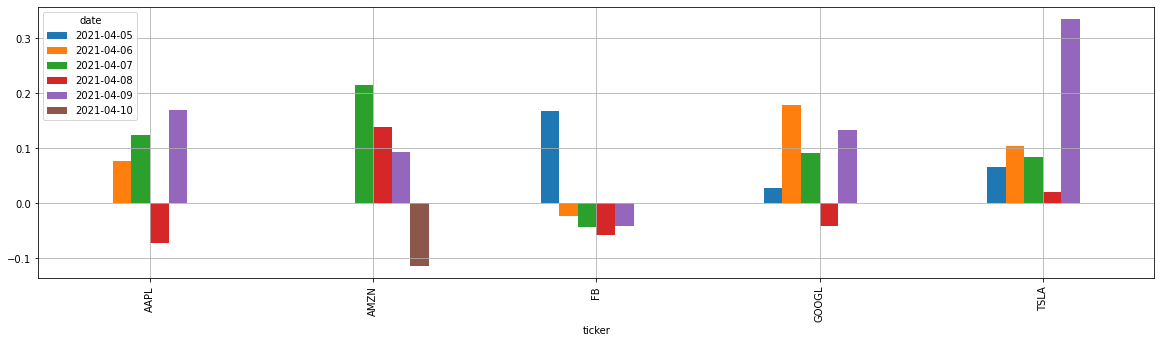

In [ ]:
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar', figsize = (20, 5))
plt.grid()
plt.style.use('dark_background')
plt.show()

In [ ]:
mean_df

date,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-10
ticker,,,,,,
AAPL,NaN,0.076838,0.123595,-0.073922,0.168379,NaN
AMZN,NaN,NaN,0.213514,0.137485,0.093067,-0.11475
FB,0.166185,-0.024405,-0.043235,-0.058608,-0.042280,NaN
GOOGL,0.027250,0.178163,0.091224,-0.042105,0.133112,NaN
TSLA,0.065843,0.103619,0.084263,0.019681,0.334564,NaN
